# **Convolutional Neural Network**

In [ ]:
# importing all important libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.utils.np_utils import to_categorical # used for convertinglabels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
import itertools
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df3=pd.read_csv("/content/drive/MyDrive/df3_final.csv")  # importing data from google drive

In [ ]:
X = df3.iloc[:,7:3079].values
y = df3.iloc[:, 3079].values
np.random.seed(3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state =0)

In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
X_train =X_train.reshape((X_train.shape[0]),32,32,3) # resizeing of the data
X_test=X_test.reshape((X_test.shape[0]),32,32,3)

In [ ]:
X_test.shape

(2003, 32, 32, 3)

Encode categorical features as a one-hot numeric array


In [ ]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
input_shape = (32,32, 3)
num_classes = 7
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       36992     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 128)        

In [ ]:
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy",metrics=["accuracy"])
epochs = 50
batch_size = 10
history = model.fit(X_train,y_train_one_hot, batch_size=batch_size,epochs = epochs, validation_split=0.1)

Epoch 1/50
721/721 [==============================] - 34s 47ms/step - loss: 0.9854 - accuracy: 0.6642 - val_loss: 0.8729 - val_accuracy: 0.6870
Epoch 2/50
721/721 [==============================] - 34s 47ms/step - loss: 0.9070 - accuracy: 0.6777 - val_loss: 0.8318 - val_accuracy: 0.6870
Epoch 3/50
721/721 [==============================] - 33s 46ms/step - loss: 0.8622 - accuracy: 0.6865 - val_loss: 0.7856 - val_accuracy: 0.7095
Epoch 4/50
721/721 [==============================] - 34s 47ms/step - loss: 0.8319 - accuracy: 0.6965 - val_loss: 0.8424 - val_accuracy: 0.6983
Epoch 5/50
721/721 [==============================] - 36s 49ms/step - loss: 0.7991 - accuracy: 0.7010 - val_loss: 0.7306 - val_accuracy: 0.7269
Epoch 6/50
721/721 [==============================] - 34s 47ms/step - loss: 0.7663 - accuracy: 0.7144 - val_loss: 0.7570 - val_accuracy: 0.7369
Epoch 7/50
721/721 [==============================] - 33s 46ms/step - loss: 0.7587 - accuracy: 0.7160 - val_loss: 0.7399 - val_accuracy:

In [ ]:
model.evaluate(X_test, y_test_one_hot)[1]

63/63 [==============================] - 3s 48ms/step - loss: 0.8993 - accuracy: 0.7459


0.745881199836731

In [ ]:
model.save_weights("model.h5") #savinf Model's weight into model.h5

**Plots of Training and validation accuracy and loss**

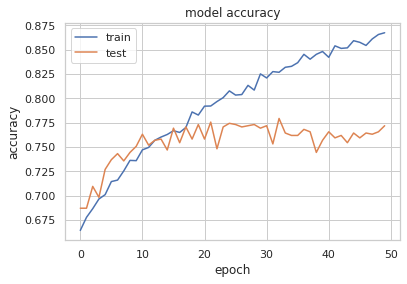

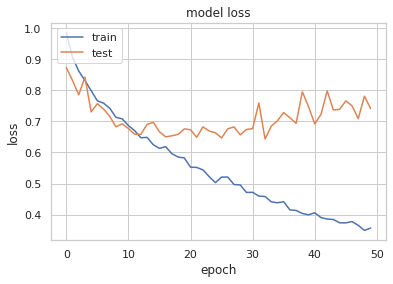

In [ ]:
 # Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Confusion Matrix and Classification reports**

In [ ]:
#Prediction of Testing image
preds=np.round(model.predict(X_test),0)

In [ ]:
cm = confusion_matrix(y_test, preds.argmax(axis=1))

In [ ]:
def plot_confusion_matrix(cm, classes,normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')
  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()

In [ ]:
cm_plot_labels = ['akiec', 'bcc', 'bkl', 'df', 'mel','nv', 'vasc']

Confusion matrix, without normalization
[[  38    6   11    0    2    3    1]
 [  57   40    5    0    1    5    3]
 [  59    4   56    0   23   55    1]
 [  12    3    7    4    0    3    0]
 [  41    1   22    0   64   95    0]
 [  83    8   37    0   38 1184    1]
 [   3    2    0    0    0    8   17]]


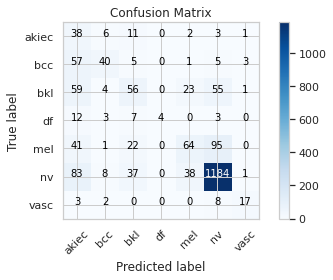

In [ ]:
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [ ]:
# Generate a classification report
report = classification_report(y_test_one_hot, preds, target_names=cm_plot_labels)
print(report)

              precision    recall  f1-score   support

       akiec       0.46      0.21      0.29        61
         bcc       0.62      0.36      0.46       111
         bkl       0.41      0.28      0.33       198
          df       1.00      0.14      0.24        29
         mel       0.50      0.29      0.36       223
          nv       0.88      0.88      0.88      1351
        vasc       0.74      0.57      0.64        30

   micro avg       0.79      0.69      0.74      2003
   macro avg       0.66      0.39      0.46      2003
weighted avg       0.76      0.69      0.71      2003
 samples avg       0.69      0.69      0.69      2003



In [ ]:
#Saving model
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>